In [1]:
!python --version

Python 3.6.12 :: Anaconda, Inc.


In [2]:
conda install -c conda-forge matplotlib 

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Fatmanur\anaconda3\envs\cmdpy36

  added / updated specs:
    - matplotlib


The following packages will be UPDATED:

  certifi            pkgs/main::certifi-2020.12.5-py36haa9~ --> conda-forge::certifi-2020.12.5-py36ha15d459_1

The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates    pkgs/main::ca-certificates-2020.12.8-~ --> conda-forge::ca-certificates-2020.12.5-h5b45459_0
  openssl              pkgs/main::openssl-1.1.1i-h2bbff1b_0 --> conda-forge::openssl-1.1.1i-h8ffe710_0


Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [3]:
import rasterio
from rasterio import plot
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
%matplotlib inline

In [4]:
import os

In [5]:
os.listdir('Desktop/Dersler/rasterio deneme')

['.ipynb_checkpoints',
 'Change Detection_cengiz.ipynb',
 'gemliksubset_band2.tif',
 'gemliksubset_band4.tif',
 'gemlık_band1.tif',
 'gemlık_band2.tif',
 'gemlık_band2_yeni.tif',
 'gemlık_band3.tif',
 'gemlık_band4.tif',
 'gemlık_band4_yeni.tif',
 'gemlık_tiff.tif',
 'izmit.tif',
 'linkler.docx',
 'Output',
 'sample.tif',
 'sentinel_band2.tif',
 'sentinel_band3.tif',
 'sentinel_band4.tif',
 'sentinel_band8.tif',
 'sentinel_rgb.tif',
 'subset5_sentinel_rgb.tif',
 'subset_gemlik.data']

In [6]:
sentinel_rgb = rasterio.open('Desktop/Dersler/rasterio deneme/subset5_sentinel_rgb.tif') #RGB Bands

In [7]:
# define constants
figure_border = 25
epsilon = 0.0001
max_y = 5000
max_steps = 500
square_side = 20
threshold_for_ndwi = 0.2
threshold_for_ship = 2

In [8]:
sentinel_rgb.bounds

BoundingBox(left=705880.0, bottom=4498630.0, right=731790.0, top=4519360.0)

In [9]:
sentinel_rgb.crs

CRS.from_epsg(32635)

In [10]:
sentinel_rgb.transform

Affine(10.0, 0.0, 705880.0,
       0.0, -10.0, 4519360.0)

In [11]:
sentinel_rgb.indexes

(1, 2, 3, 4)

In [12]:
sentinel_rgb.read(3)

array([[1234,  944, 1098, ...,  486,  438,  397],
       [ 938, 1888, 1500, ...,  399,  523,  517],
       [1844, 1896, 1636, ...,  302,  382,  552],
       ...,
       [ 626,  681,  550, ...,  362,  425,  476],
       [ 503,  577,  540, ...,  346,  383,  418],
       [ 498,  604,  558, ...,  318,  324,  301]], dtype=uint16)

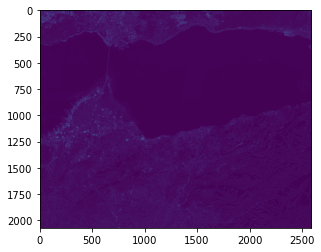

<AxesSubplot:>

In [34]:
img = sentinel_rgb.read(3)
show(img)

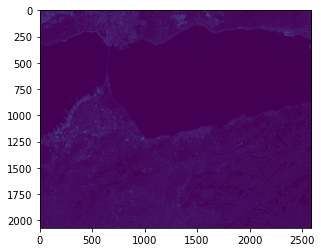

<AxesSubplot:>

In [38]:
img2 = sentinel_rgb.read(4)
show(img2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


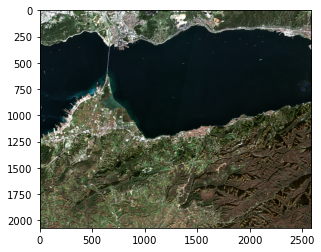

<AxesSubplot:>

In [16]:
#producing RGB map with sentinel image
from rasterio.plot import show, adjust_band
imgdata = np.array([adjust_band(sentinel_rgb.read(i)) for i in (4,3,2)])
show(imgdata*10)  # factor 10 to increase brightness

In [20]:
#NDWI Bands green and NIR
band3 = rasterio.open('Desktop/Dersler/rasterio deneme/sentinel_band3.tif') #green
band8 = rasterio.open('Desktop/Dersler/rasterio deneme/sentinel_band8.tif') #NIR

In [21]:
band3.height
band3.width
band3.crs
band3.transform

Affine(1.0, 0.0, 0.0,
       0.0, 1.0, 0.0)

In [23]:
band3.read(1)
band8.read(1)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

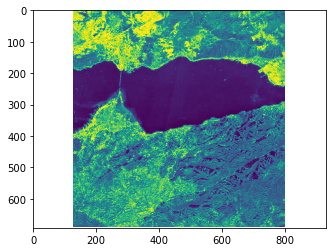

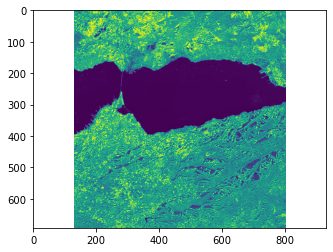

<AxesSubplot:>

In [25]:
plot.show(band3)
plot.show(band8)

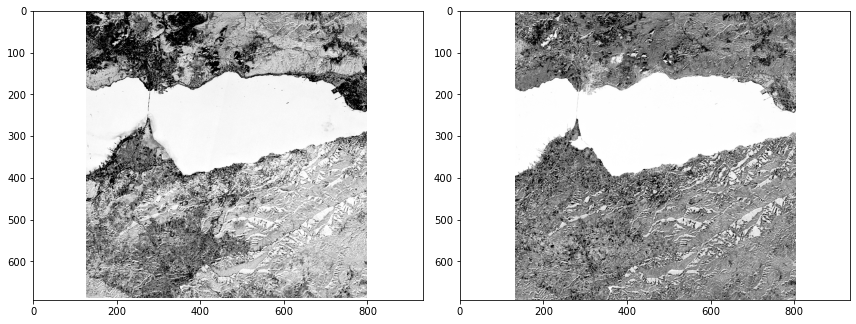

In [26]:
#multiple band representation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
plot.show(band3, ax=ax1, cmap='Greys') #green
plot.show(band8, ax=ax2, cmap='Greys') #nir
fig.tight_layout()

In [27]:
green = band3.read(1).astype('float64')
nir = band8.read(1).astype('float64')

In [48]:
#NDWI calculation, 5 for eliminating the 0 value of equation
ndwi=((nir-green-5)/(nir+green+5))

In [49]:
#export NDWI image
ndwiImage = rasterio.open('Desktop/sentinel_output_ndwi.tif','w',driver='Gtiff',
                          width=band8.width, 
                          height = band8.height, 
                          count=1, crs=band8.crs, 
                          transform=band8.transform,
                         dtype='float64')
ndwiImage.write(ndwi,1)
ndwiImage.close()

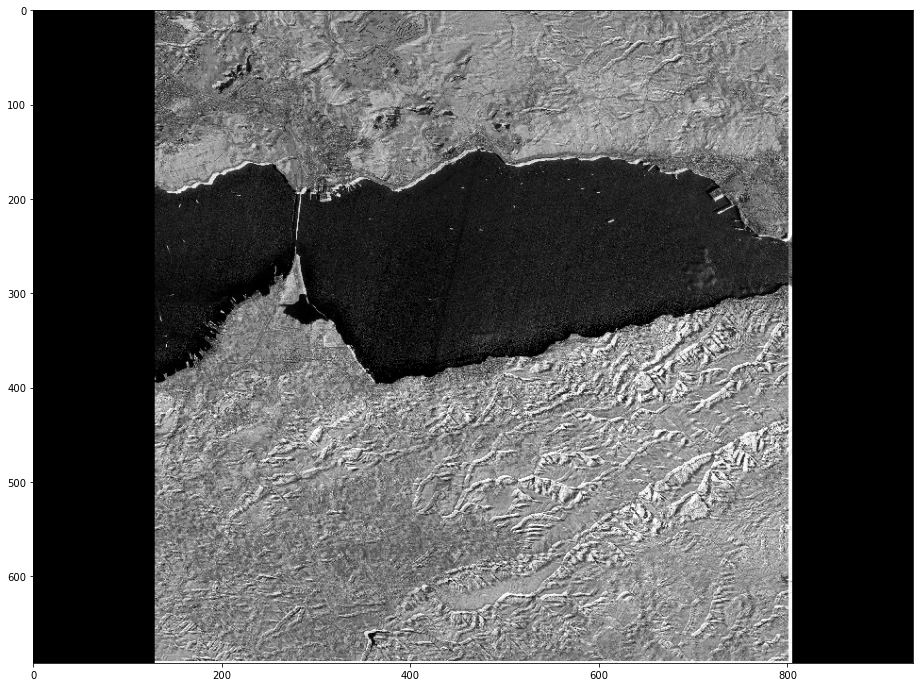

<AxesSubplot:>

In [50]:
#plot NDWI
ndwiImage = rasterio.open('Desktop/sentinel_output_ndwi.tif') 
fig = plt.figure(figsize=(18,12))
plot.show(ndwiImage, cmap='gray')

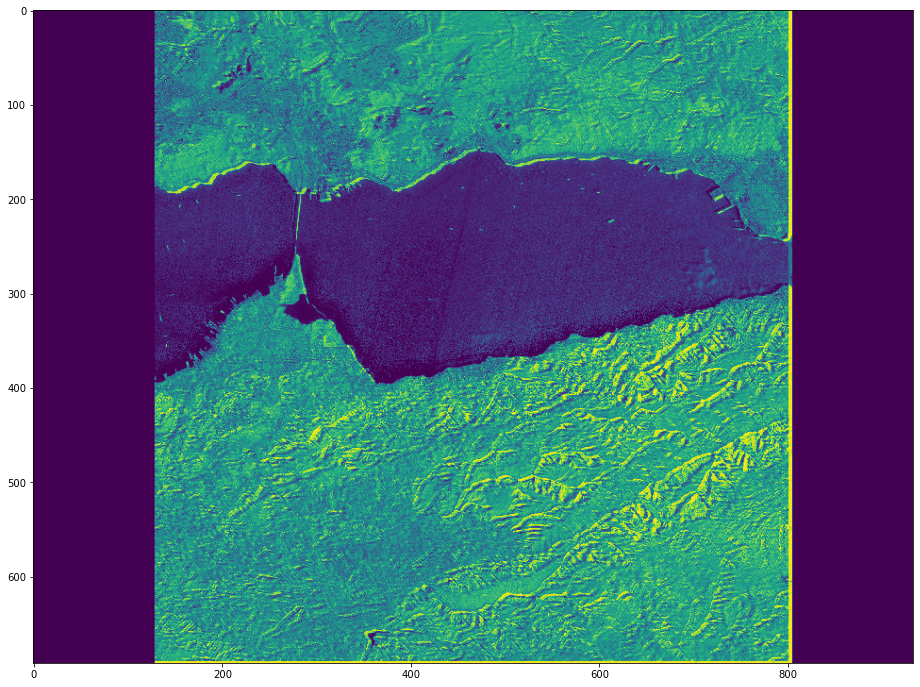

<AxesSubplot:>

In [31]:
#plot NDWI
ndwi2 = rasterio.open('Desktop/sentinel_output_ndwi.tif')
fig = plt.figure(figsize=(18,12))
plot.show(ndwi)

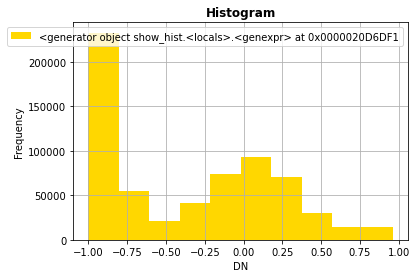

TypeError: 'NoneType' object is not iterable

In [33]:
#plot a histogram NDWI
def image_histogram(ndwi2):
    from rasterio.plot import show_hist
    co, ce =show_hist(ndwi)
    fig = plt.figure(figsize=(10,7))
    fig.set_facecolor('yellow')
    plt.plot(ce[1::], co[1::])
    plt.show()
get_ipython().run_line_magic('matplotlib', 'inline')
image_histogram(ndwi2) 